In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.manual_seed(123)

In [2]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [4]:
from torchvision import datasets, transforms
data_path = '../data/ch7'
cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

In [5]:
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

In [7]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [9]:
import torch.nn as nn

n_out = 2

model = nn.Sequential(
            nn.Linear(
                3072,
                512,
            ),
            nn.Tanh(),
            nn.Linear(
                512,
                n_out,
            )
        )

In [10]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

$
softmax(x_1, x_2) = (\frac{e^{x_1}}{e^{x_1} + e^{x_2}},\frac{e^{x_2}}{e^{x_1} + e^{x_2}}) \\
softmax(x_1, \dots, x_n) = (\frac{e^{x_1}}{e^{x_1} + \dots + e^{x_n}}, \dots, \frac{e^{x_n}}{e^{x_1} + \dots + e^{x_n}})
$

In [16]:
x = torch.tensor([1., 2., 3.])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [12]:
softmax(x).sum()

tensor(1.)

$
\sum softmax(x)=\sum\limits_{i=0}^{N}\frac{e^i}{\sum_{j=0}^{N} e^j}=1
$

In [20]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1., 2., 3.],
                  [1., 2., 3.]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [21]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


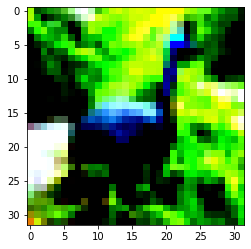

In [22]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [23]:
img_batch = img.view(-1).unsqueeze(0)

In [24]:
out = model(img_batch)
out

tensor([[0.4784, 0.5216]], grad_fn=<SoftmaxBackward>)

In [33]:
_, index = torch.max(out, dim=1)
index

tensor([1])

In [34]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1),
        )

In [35]:
loss = nn.NLLLoss()

In [36]:
img, label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(0.5077, grad_fn=<NllLossBackward>)